In [1]:
import requests
import os
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionUpscalePipeline
import torch
import io

In [2]:
torch.cuda.empty_cache()
torch.cuda.memory_allocated()
torch.cuda.max_memory_allocated(device=None)

0

In [3]:
# os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "caching_allocator"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"

In [4]:
# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")
# Move the pipeline to GPU if available and enable optimizations for memory usage and speed
pipeline.enable_attention_slicing()
pipeline.enable_xformers_memory_efficient_attention()

text_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


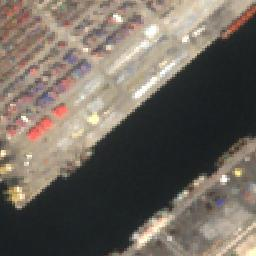

In [5]:
# load image from url
# ---------------------------------
# url = "https://cdn.pixabay.com/photo/2017/02/07/16/47/kingfisher-2046453_640.jpg"
# response = requests.get(url)
# low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
# low_res_img = low_res_img.resize(shape=(200, 128))
# low_res_img

# load image from disk
# ---------------------------------
# img = Image.open(r"C:\Users\user2\Desktop\Sentinel upscaling\1-sentinel_api_original.jpg")
img = Image.open(r"C:\Users\user2\Desktop\Sentinel upscaling\StableDiffusion\4-i.jpg")

# Convert image to bytes
img_byte_arr = io.BytesIO()
img.save(img_byte_arr, format='JPEG')
img_byte_arr = img_byte_arr.getvalue()

# Load bytes to PIL Image  
low_res_img = Image.open(io.BytesIO(img_byte_arr)).convert('RGB')
# low_res_img = low_res_img.resize((768, 768))
low_res_img

In [6]:
prompt = "a sattelite image of a sea port and ocean"
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image

  0%|          | 0/75 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
upscaled_image.save("4-o.jpg")